# Momentum

[Investopedia Link](https://www.investopedia.com/articles/technical/081501.asp)

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import talib as ta

## Import Stock Price of Reliance

In [2]:
symbol = 'RELIANCE.NS'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,542.000000,545.000000,536.174988,542.549988,530.454773,3244916
2017-01-03,544.924988,548.500000,540.549988,544.700012,532.556885,2941502
2017-01-04,546.450012,546.500000,532.150024,533.575012,521.679932,4751094
2017-01-05,535.500000,539.950012,534.375000,538.700012,526.690674,3992966
2017-01-06,537.099976,542.500000,536.549988,537.474976,525.492920,3586854


### Calculating Momentum (10 Period)

In [3]:
df['Momentum'] = ta.MOM(df['Close'], timeperiod = 10)
df.dropna(inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Momentum
Date,,,,,,,
2017-01-16,544.974976,546.974976,536.974976,538.125000,526.128418,5492010,-4.424988
2017-01-17,532.500000,534.000000,519.250000,520.625000,509.018524,17936580,-24.075012
2017-01-18,521.299988,524.000000,514.375000,516.275024,504.765564,7254142,-17.299988
2017-01-19,517.575012,522.650024,515.500000,516.849976,505.327698,6987456,-21.850037
2017-01-20,516.974976,518.724976,511.950012,512.900024,501.465820,4016164,-24.574951


### Graphical Analysis

In [4]:
#to convert a string in datetime format
from datetime import datetime
date_time_str = '01/01/18 00:00:00'
date_time_obj = datetime. strptime(date_time_str, '%d/%m/%y %H:%M:%S')

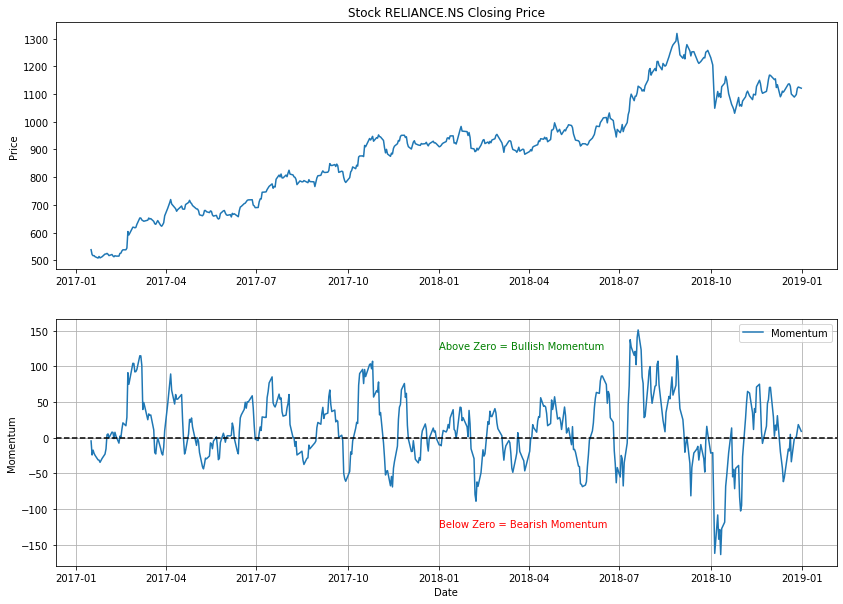

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Close'], label = 'Closing Price')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Momentum'], label='Momentum')
ax2.axhline(y=0, color='black', linestyle='--')
#ax2.axhline(y=10, color='red')
#ax2.axhline(y=-10, color='green')
ax2.text(date_time_obj, 125, 'Above Zero = Bullish Momentum', color = 'green')
ax2.text(date_time_obj, -125, 'Below Zero = Bearish Momentum', color = 'red')
ax2.grid()
ax2.set_ylabel('Momentum')
ax2.set_xlabel('Date')
ax2.legend(loc='best')